# ARIMA model for exchange rates

We will use arima model to find relation within exchange rates time series.

### Import packages.

- `pandas` - package for data manipulation, it will be used to load data from csv.
- `matplotlib` - library for image plotting.
- `statsmodels` - library of statistical models. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Load the data.

The data is stored in 'exchange.csv' file. It is represented as a set of (date, exchange rate) pairs.

In [2]:
def load_data(file_name):
    return pd.read_csv(file_name, parse_dates = [0], index_col = 0, header = 0)

In [3]:
data = load_data('exchange.csv')
data.describe()

,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


In [4]:
data.head()

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96


### Build ARIMA model.

Here we build and train ARIMA model using `ARIMA` class from `statsmodel.tsa.arima_model`.

In [5]:
def model(data, p, d, q):
    model = ARIMA(data, order=(p, d, q))
    model = model.fit(disp = 0)
    return model.forecast()[0]

In [6]:
data = load_data('exchange.csv').values # convert to np.ndarray
train, test = train_test_split(data, test_size = 0.3, shuffle=False)

print("Train shape: " + str(train.shape))
print("Test shape: " + str(test.shape))

Train shape: (3570, 1)
Test shape: (1530, 1)


In [7]:
preds = []
input_data = train.copy().tolist()

p, d, q = 3, 1, 0

for index, value in enumerate(test):
    pred = model(input_data, p, d, q)
    
    if (index % 100 == 0):
        print("Real value: {0}, Predicted value: {1}".format(value, pred))
    
    preds.append(pred)
    input_data.append(value)

Real value: [25.703], Predicted value: [24.57641016]
Real value: [42.35], Predicted value: [40.81813596]
Real value: [48.866], Predicted value: [50.94350437]
Real value: [57.668], Predicted value: [57.91148693]
Real value: [68.949], Predicted value: [69.29084846]
Real value: [71.738], Predicted value: [72.25845069]
Real value: [87.08], Predicted value: [87.26278957]
Real value: [87.996], Predicted value: [87.45077884]
Real value: [81.399], Predicted value: [81.46626]
Real value: [62.52], Predicted value: [63.26702394]


/home/vasniktel/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Real value: [29.877], Predicted value: [32.22912086]
Real value: [41.02], Predicted value: [39.58565673]
Real value: [36.472], Predicted value: [37.0727161]
Real value: [42.03], Predicted value: [42.19647678]
Real value: [54.19], Predicted value: [53.57370351]
Real value: [46.227], Predicted value: [46.15172243]


In [8]:
print("Error: " + str(mean_squared_error(test, preds)))

Error: 1.5513681413965725


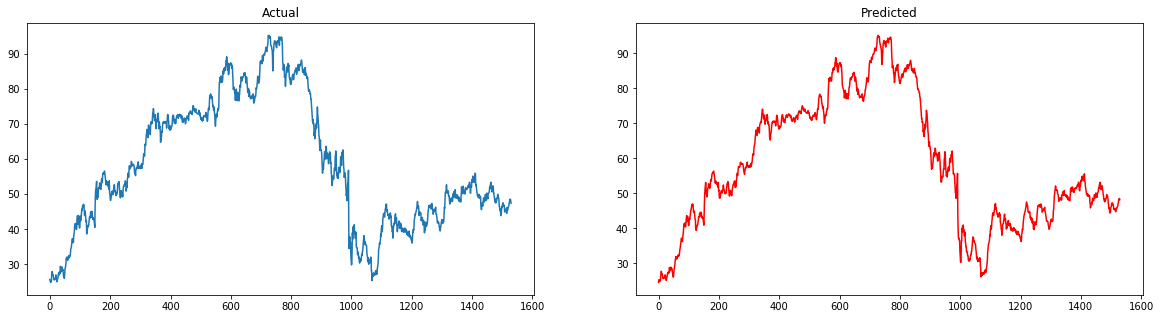

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].plot(test)
axes[0].set_title('Actual')

axes[1].plot(preds, color='red')
axes[1].set_title('Predicted')

plt.show()